## Questão 1
Nesta questão é pedido para vermos como seria classificado, em termos de felicidade, uma pessoa rica, casada e saudável usando Naive Bayes.

Para isto, foi calculado cada uma das probabilidades condicionais, feito os cálculos até chegar na hipótese com maior probabilidade a *posteriori*

Para auxiliar o desenvolvimeto foi usada a biblioteca pandas

In [25]:
import pandas as pd

data = {
    'Rico': [1, 0, 1, 1, 0, 1, 0, 0, 0],
    'Casado': [1, 0, 1, 0, 0, 0, 0, 1, 0],
    'Saudável': [1, 1, 0, 1, 0, 0, 1, 0, 0],
    'Feliz': [1, 1, 1, 1, 0, 0, 0, 0, 0]
}

# Criando o DataFrame
df = pd.DataFrame(data)

# Mostrando a tabela inicial
print("Tabela de dados:\n", df)

# Separando os dados entre pessoas felizes e infelizes
df_feliz = df[df['Feliz'] == 1]
df_infeliz = df[df['Feliz'] == 0]

# Contando o número de ocorrências para cada atributo
total_feliz = len(df_feliz)
total_infeliz = len(df_infeliz)
total = len(df)

# Função para calcular a probabilidade condicional
def prob_condicional(df, atributo, valor):
    return len(df[df[atributo] == valor]) / len(df)

# Cálculo das probabilidades condicionais em cima do caso que será analisado
P_rico_dado_feliz = prob_condicional(df_feliz, 'Rico', 0)
P_casado_dado_feliz = prob_condicional(df_feliz, 'Casado', 1)
P_saudavel_dado_feliz = prob_condicional(df_feliz, 'Saudável', 1)

P_rico_dado_infeliz = prob_condicional(df_infeliz, 'Rico', 0)
P_casado_dado_infeliz = prob_condicional(df_infeliz, 'Casado', 1)
P_saudavel_dado_infeliz = prob_condicional(df_infeliz, 'Saudável', 1)

# Probabilidades a priori
P_feliz = total_feliz / total
P_infeliz = total_infeliz / total

# Mostrando os cálculos intermediários
print("\n--- Probabilidades Condicionais para 'Feliz' ---")
print(f"P(não rico | feliz) = {P_rico_dado_feliz}")
print(f"P(casado | feliz) = {P_casado_dado_feliz}")
print(f"P(saudável | feliz) = {P_saudavel_dado_feliz}")

print("\n--- Probabilidades Condicionais para 'Infeliz' ---")
print(f"P(não rico | infeliz) = {P_rico_dado_infeliz}")
print(f"P(casado | infeliz) = {P_casado_dado_infeliz}")
print(f"P(saudável | infeliz) = {P_saudavel_dado_infeliz}")

print("\n--- Probabilidades a priori ---")
print(f"P(feliz) = {P_feliz}")
print(f"P(infeliz) = {P_infeliz}")


# Usando o Naive Bayes para calcular as probabilidades
P_feliz_dado_atributos = P_rico_dado_feliz * P_casado_dado_feliz * P_saudavel_dado_feliz * P_feliz
P_infeliz_dado_atributos = P_rico_dado_infeliz * P_casado_dado_infeliz * P_saudavel_dado_infeliz * P_infeliz

# Mostrando os cálculos das probabilidades finais
print("\n--- Probabilidade final (Feliz) ---")
print(f"P(feliz | não rico, casado, saudável) = {P_feliz_dado_atributos}")

print("\n--- Probabilidade final (Infeliz) ---")
print(f"P(infeliz | não rico, casado, saudável) = {P_infeliz_dado_atributos}")


# Comparando as probabilidades
if P_feliz_dado_atributos > P_infeliz_dado_atributos:
    print("\nA pessoa é classificada como FELIZ.")
else:
    print("\nA pessoa é classificada como INFELIZ.")

Tabela de dados:
    Rico  Casado  Saudável  Feliz
0     1       1         1      1
1     0       0         1      1
2     1       1         0      1
3     1       0         1      1
4     0       0         0      0
5     1       0         0      0
6     0       0         1      0
7     0       1         0      0
8     0       0         0      0

--- Probabilidades Condicionais para 'Feliz' ---
P(não rico | feliz) = 0.25
P(casado | feliz) = 0.5
P(saudável | feliz) = 0.75

--- Probabilidades Condicionais para 'Infeliz' ---
P(não rico | infeliz) = 0.8
P(casado | infeliz) = 0.2
P(saudável | infeliz) = 0.2

--- Probabilidades a priori ---
P(feliz) = 0.4444444444444444
P(infeliz) = 0.5555555555555556

--- Probabilidade final (Feliz) ---
P(feliz | não rico, casado, saudável) = 0.041666666666666664

--- Probabilidade final (Infeliz) ---
P(infeliz | não rico, casado, saudável) = 0.01777777777777778

A pessoa é classificada como FELIZ.


## Questão 2
A questão pede para prevermos se o cliente deve ou não receber um empréstimo baseado nos itens:
* Ter ou não casa própria
* Estado civil (Solteiro, Casado ou Divorciado)
* Rendimento (Alto, Médio ou Baixo)

Para isso foi usada a biblioteca DecisionTreeClassifier do sklearn.tree

In [27]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

data = {
    'Tem casa própria': ['Sim', 'Não', 'Não', 'Sim', 'Não', 'Não', 'Sim', 'Não', 'Não', 'Não', 'Sim'],
    'Estado Civil': ['Solteiro', 'Casado', 'Solteiro', 'Casado', 'Divorciado', 'Casado', 'Divorciado', 'Solteiro', 'Casado', 'Solteiro', 'Divorciado'],
    'Rendimentos': ['Alto', 'Médio', 'Baixo', 'Alto', 'Médio', 'Baixo', 'Alto', 'Médio', 'Baixo', 'Médio', 'Médio'],
    'Bom Pagador': ['Não', 'Não', 'Não', 'Não', 'Sim', 'Não', 'Sim', 'Sim', 'Não', 'Sim', 'Não']
}

df = pd.DataFrame(data)

print("Tabela de dados de treino:\n", df)

# Convertendo as variáveis categóricas para numéricas
df_dummies = pd.get_dummies(df)

# Mostrando a tabela após a conversão
print("\nTabela após a conversão de variáveis categóricas:\n", df_dummies)

# Separando os atributos (x) e o alvo (y) da tabela original
x = df_dummies.drop('Bom Pagador_Sim', axis=1)
y = df_dummies['Bom Pagador_Sim']

# Mostrando os atributos e o alvo
print("\nAtributos (X):\n", x.head())
print("\nAlvo (y):\n", y.head())

# Criação da instância do classificador de árvore de decisão
clf = DecisionTreeClassifier()

# Treinando a árvore
clf.fit(x, y)

# Mostrando as colunas usadas no treino
print("\nColunas de treino:", x.columns)

# Dados do registro 12 (Tem casa própria = Não, Estado civil = Divorciado, Rendimentos = Alto)
registro_12 = pd.DataFrame({
    'Tem casa própria': ['Não'],
    'Estado Civil': ['Divorciado'],
    'Rendimentos': ['Alto']
})

# Convertendo o registro 12 para o mesmo formato de colunas usadas no treino
registro_12_dummies = pd.get_dummies(registro_12)

# Garantindo que as colunas do registro 12 sejam as mesmas do treino para evitar incompatibilidade de tamanhos
registro_12_dummies = registro_12_dummies.reindex(columns=x.columns, fill_value=0)

print("\nColunas do registro 12 após reindexação:\n", registro_12_dummies)

# Fazendo a previsão para o registro 12
predicao = clf.predict(registro_12_dummies)

# Mostrando o resultado da previsão
print("\nPrevisão para o registro 12:")
if predicao == 1:
    print("Registro 12: Bom Pagador")
else:
    print("Registro 12: Mau Pagador")

Tabela de dados de treino:
    Tem casa própria Estado Civil Rendimentos Bom Pagador
0               Sim     Solteiro        Alto         Não
1               Não       Casado       Médio         Não
2               Não     Solteiro       Baixo         Não
3               Sim       Casado        Alto         Não
4               Não   Divorciado       Médio         Sim
5               Não       Casado       Baixo         Não
6               Sim   Divorciado        Alto         Sim
7               Não     Solteiro       Médio         Sim
8               Não       Casado       Baixo         Não
9               Não     Solteiro       Médio         Sim
10              Sim   Divorciado       Médio         Não

Tabela após a conversão de variáveis categóricas:
     Tem casa própria_Não  Tem casa própria_Sim  Estado Civil_Casado  \
0                  False                  True                False   
1                   True                 False                 True   
2                   Tru

## Questão 4

Esta questão pede para treinar uma máquina usando Random Forest para analisar se os dados estão dentro ou fora de alguma das elipses de um plano certesiano.

Para realizar isso foi usado a biblioteca RandomForestClassifier do conjunto sklean.

Começamos então montando as elipses no plano. Depois fazendo o algoritmo para identificar se o ponto está ou não em alguma das elipses e por fim, treinar a Random Forest com os dados.

Acurácia do modelo: 96.60%


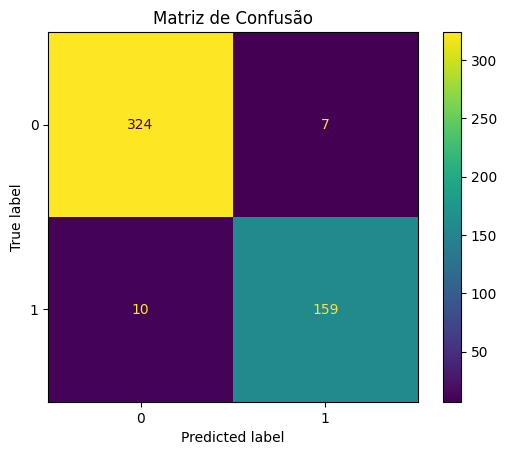

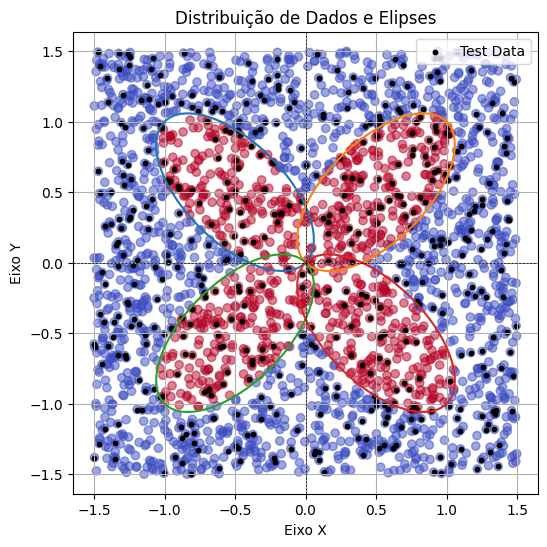

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

def plot_rotated_ellipse(p1, p2, rotation_angle, ax):
    # Centro da elipse
    center = (p1 + p2) / 2

    # Semi-eixos da elipse
    a = np.linalg.norm(p2 - p1) / 2  # semi-eixo maior
    b = a / 2  # semi-eixo menor

    # Criando os ângulos para a elipse
    theta = np.linspace(0, 2 * np.pi, 100)

    # Equações paramétricas da elipse
    x = center[0] + a * np.cos(theta)
    y = center[1] + b * np.sin(theta)

    # Matriz de rotação para encaixar as elipses nas posições corretas
    R = np.array([[np.cos(rotation_angle), -np.sin(rotation_angle)],
                  [np.sin(rotation_angle),  np.cos(rotation_angle)]])

    # Aplicando a rotação
    rotated_points = R @ np.vstack((x - center[0], y - center[1]))
    x_rotated = rotated_points[0, :] + center[0]
    y_rotated = rotated_points[1, :] + center[1]

    return x_rotated, y_rotated

# Função para verificar se um ponto está dentro da elipse
def is_point_in_ellipse(point, p1, p2, rotation_angle):
    # Centro da elipse
    center = (p1 + p2) / 2
    a = np.linalg.norm(p2 - p1) / 2
    b = a / 2

    # Transforma o ponto para o sistema de coordenadas da elipse
    # Primeiro, centralizamos o ponto
    point_centered = point - center

    # Aplicamos a rotação inversa para verificar
    R_inv = np.array([[np.cos(-rotation_angle), -np.sin(-rotation_angle)],
                      [np.sin(-rotation_angle),  np.cos(-rotation_angle)]])

    point_rotated = R_inv @ point_centered

    # Verifica se o ponto está dentro da elipse
    return (point_rotated[0] ** 2) / (a ** 2) + (point_rotated[1] ** 2) / (b ** 2) <= 1

# Gerando dados aleatórios
np.random.seed(42)
num_samples = 2500
x = np.random.uniform(-1.5, 1.5, (num_samples, 2))

# Definindo elipses
ellipses = [
    (np.array([0, 0]), np.array([-1, 1]), -np.pi / 4),  # Elipse 1
    (np.array([0, 0]), np.array([1, 1]), np.pi / 4),    # Elipse 2
    (np.array([-1, -1]), np.array([0, 0]), np.pi / 4),  # Elipse 3
    (np.array([0, 0]), np.array([1, -1]), -np.pi / 4),  # Elipse 4
]

# Rotulando os dados
y = np.zeros(num_samples)  # Classe 2 por padrão

for i in range(num_samples):
    for p1, p2, angle in ellipses:
        if is_point_in_ellipse(X[i], p1, p2, angle):
            y[i] = 1  # Classe 1 se dentro de alguma elipse
            break

# Divisão dos dados para treino e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Treinando o modelo Random Forest
rf = RandomForestClassifier(n_estimators=1000, random_state=42)
rf.fit(x_train, y_train)

y_pred = rf.predict(x_test)

# Calculando a acurácia
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo: {accuracy *100 :.2f}%")

# Exibindo a matriz de confusão
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()
plt.title('Matriz de Confusão')
plt.show()

# Plotando as elipses e os dados
plt.figure(figsize=(6, 6))
for p1, p2, angle in ellipses:
    x_ellipse, y_ellipse = plot_rotated_ellipse(p1, p2, angle, plt.gca())
    plt.plot(x_ellipse, y_ellipse)

# Alterando a visualização dos dados
plt.scatter(x[:, 0], x[:, 1], c=y, cmap='coolwarm', alpha=0.5, marker='o')
plt.scatter(x_test[:, 0], x_test[:, 1], c='black', s=10, label='Test Data', edgecolor='k')
plt.axhline(0, color='black', linewidth=0.5, ls='--')
plt.axvline(0, color='black', linewidth=0.5, ls='--')
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.title('Distribuição de Dados e Elipses')
plt.xlabel('Eixo X')
plt.ylabel('Eixo Y')
plt.grid()
plt.legend()
plt.axis('equal')
plt.show()


## Questão 5
Nesta questão é pedido para avaliarmos a probabilide da inflação ser alta caso o preço do petróleo (bp) esteja num nível "normal" e o preço das ações dos varejistas (rt) esteja "alto". Antes é preciso montar a Rede de Crença como pode ser visto no código abaixo usando a ferramenta mermaid de diagramas.

Para montar essa Rede de Crença verificamos a parentalidade de condições, sendo assim:
* bp que depende de oil
* oil depende de eh
* rt depende de inf e eh
* inf depende de oil e eh



In [24]:
import base64
from IPython.display import Image, display
import matplotlib.pyplot as plt

def mm(graph):
    graphbytes = graph.encode("utf8")
    base64_bytes = base64.urlsafe_b64encode(graphbytes)
    base64_string = base64_bytes.decode("ascii")
    display(Image(url="https://mermaid.ink/img/" + base64_string))

mm("""
graph LR
    subgraph Rede de Crença
        A(oil) --> B(bp)
        A --> C(inf)
        D(eh) --> A
        D --> C
        D --> E(rt)
        C --> E
    end
""")

Vamos instalar a biblioteca pgmpy para calcular a Rede Bayesiana

In [ ]:
pip install pgmpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 9.2 MB/s eta 0:00:00


In [19]:
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import VariableElimination

# Definição da estrutura da rede
model = BayesianNetwork([('oil', 'bp'), ('oil', 'inf'), ('eh', 'oil'), ('eh', 'inf'), ('eh', 'rt'), ('inf', 'rt')])

# Definição das probabilidades condicionais
cpd_oil = TabularCPD('oil', 2, [[0.7, 0.9], [0.3, 0.1]],
                     evidence=['eh'], evidence_card=[2],
                     state_names={'oil': ['low', 'high'], 'eh': ['low', 'high']})


cpd_bp = TabularCPD('bp', 3, [[0.9, 0.1], [0.05, 0.8], [0.05, 0.1]],
                     evidence=['oil'], evidence_card=[2],
                     state_names={'bp': ['low', 'normal', 'high'], 'oil': ['low', 'high']})


cpd_inf = TabularCPD('inf', 2, [[0.9, 0.8, 0.7, 0.1], [0.1, 0.2, 0.3, 0.9]],
                     evidence=['oil', 'eh'], evidence_card=[2, 2],
                     state_names={'inf': ['low', 'high'], 'oil': ['low', 'high'], 'eh': ['low', 'high']})


cpd_eh = TabularCPD('eh', 2, [[0.6], [0.4]],
                     state_names={'eh': ['low', 'high']})


cpd_rt = TabularCPD('rt', 2, [[0.8, 0.2, 0.9, 0.1], [0.2, 0.8, 0.1, 0.9]],
                     evidence=['inf', 'eh'], evidence_card=[2, 2],
                     state_names={'rt': ['low', 'high'], 'inf': ['low', 'high'], 'eh': ['low', 'high']})

# Adicionando as probabilidades ao modelo em questão
model.add_cpds(cpd_oil, cpd_bp, cpd_inf, cpd_eh, cpd_rt)

assert model.check_model()

infer = VariableElimination(model)

# Calculando a probabilidade de INFLAÇÃO ser ALTA dado bp = normal e rt = high
prob = infer.query(variables=['inf'], evidence={'bp': 'normal', 'rt': 'high'})
print("A probabilidade da inflação ser alta dado bp = normal e rt = high é de:")
print(prob)


A probabilidade da inflação ser alta dado bp = normal e rt = high é de:
+-----------+------------+
| inf       |   phi(inf) |
+===========+============+
| inf(low)  |     0.5302 |
+-----------+------------+
| inf(high) |     0.4698 |
+-----------+------------+
